# Declaration of Originality

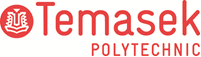

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Lean Kah Bao (2404787J)
* Tutorial Group                : PC04
* Tutor						    : Effendi Baba
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [3]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: Predict laptop Price

# 2. Data Understanding

## 2.1 Load dataset

In [4]:
## Read *.csv file into pandas DataFrame
FILEPATH = "laptop_price.csv"
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

## 2.2 Summary Statistics

In [5]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
## Check for missing data
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [7]:
## Describe data distribution
df.describe(include="all")

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

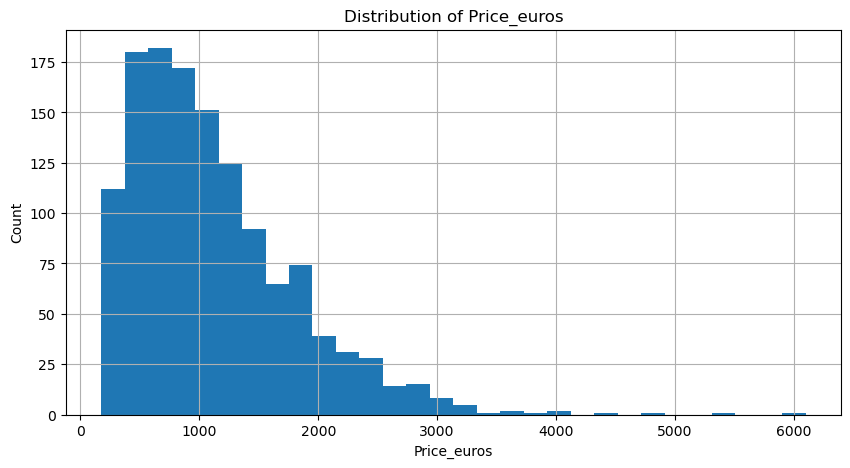

In [ ]:
## Understanding distribution of target
col_y = 'Price_euros'
df.hist(column=col_y, bins=30, figsize=(10,5))
plt.title(f'Distribution of {col_y}')
plt.xlabel(col_y)
plt.ylabel('Count')
plt.show()

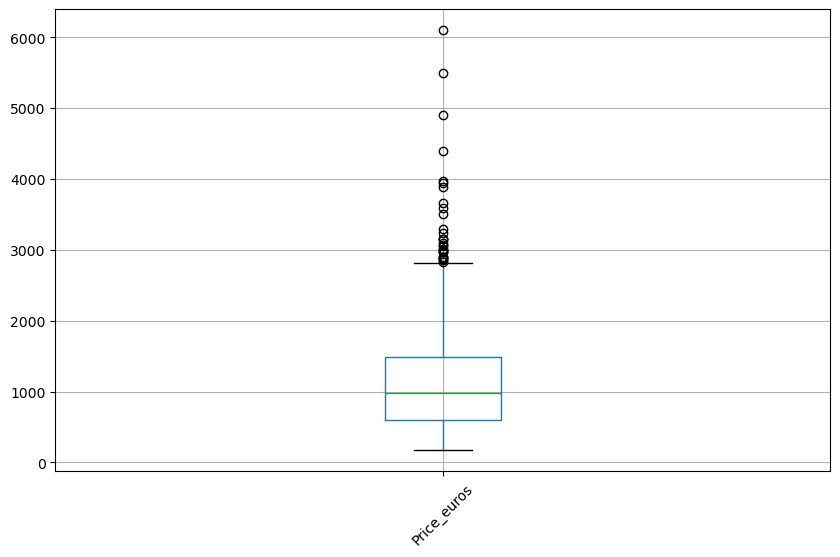

In [ ]:
# Select specific columns first
subset = df[['Price_euros']]
subset.boxplot(rot=45, figsize=(10, 6))
plt.show()

<span style = "color:#42bef5;">
The histogram shows that the Price_euros variable is right-skewed.
The boxplot shows that the median is around 1,000 dollar. With the majority of the products falls betwenn 600 and 1,500 dollar. There are extreme outlier at 4,300 and above. 

### 2.3.1.2 Understanding distribution of features

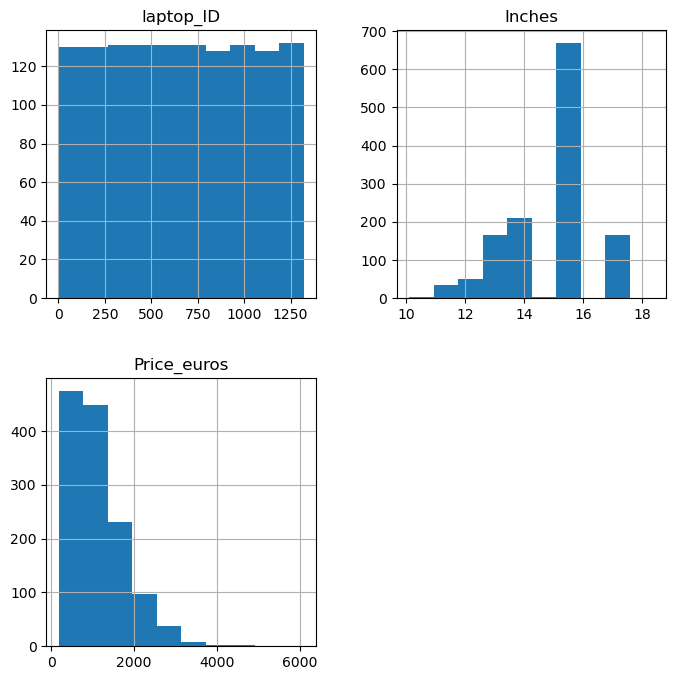

In [7]:
## Understanding distribution of features
df.hist(figsize=(8,8))
plt.show()

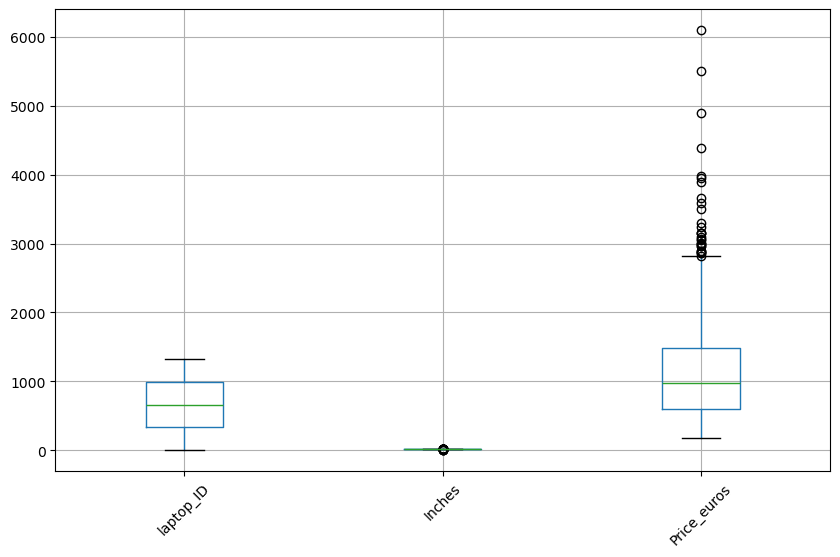

In [8]:
df.boxplot(rot=45, figsize=(10,6))
plt.show()

### 2.3.2 Understanding relationship between variables

In [11]:
## Understanding relationship between variables
col_numeric = df.select_dtypes(include=['float', 'int']).columns
df_corr = df[col_numeric].corr()
df_corr

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [ ]:
sns.heatmap(df_corr,cmap='RdYlGn')
plt.show()

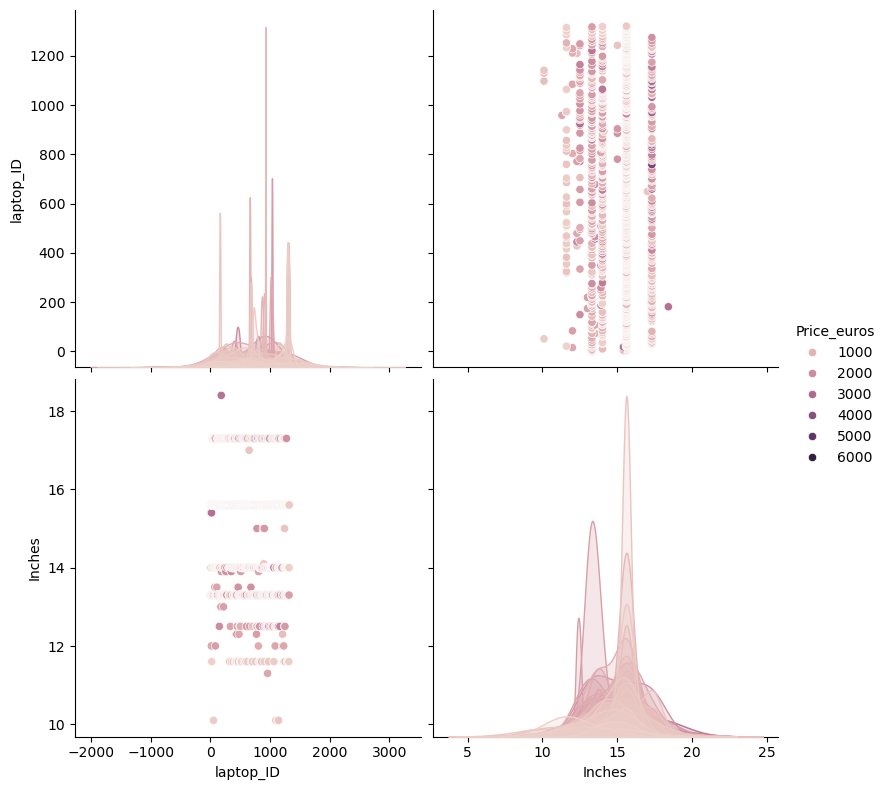

In [12]:
sns.pairplot(df, hue=col_y, height=4, aspect=1)
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
## Clean data
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [14]:
# Extract X and Y dimensions using Regex pattern (\d+)x(\d+)
# This finds "Numbers" followed by "x" followed by "Numbers"
res_data = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')

df['X_res'] = res_data[0].astype(int)
df['Y_res'] = res_data[1].astype(int)

# Now calculate PPI (Pixels Per Inch)
# Formula: sqrt(X^2 + Y^2) / Inches
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5) / df['Inches']

# Drop the intermediate X_res and Y_res columns if you don't need them
df = df.drop(columns=['X_res', 'Y_res'])

# Check the result
print(df[['ScreenResolution', 'PPI']].head(15))

                      ScreenResolution         PPI
0   IPS Panel Retina Display 2560x1600  226.983005
1                             1440x900  127.677940
2                    Full HD 1920x1080  141.211998
3   IPS Panel Retina Display 2880x1800  220.534624
4   IPS Panel Retina Display 2560x1600  226.983005
5                             1366x768  100.454670
6   IPS Panel Retina Display 2880x1800  220.534624
7                             1440x900  127.677940
8                    Full HD 1920x1080  157.350512
9          IPS Panel Full HD 1920x1080  157.350512
10                            1366x768  100.454670
11                   Full HD 1920x1080  141.211998
12  IPS Panel Retina Display 2880x1800  220.534624
13                   Full HD 1920x1080  141.211998
14  IPS Panel Retina Display 2304x1440  226.415547


In [15]:
# 2.3 Simplify CPU (Group into i3, i5, i7, AMD, etc.)
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        elif text.split()[0] == 'AMD':
            return 'AMD Processor'
        else:
            return 'Other Processor'

# Extract first 3 words "Intel Core i5"
df['Cpu_Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))
df['Cpu_Brand'] = df['Cpu_Name'].apply(fetch_processor)

# Check the result
print(df[['Cpu', 'Cpu_Brand']].head(15))

                           Cpu              Cpu_Brand
0         Intel Core i5 2.3GHz          Intel Core i5
1         Intel Core i5 1.8GHz          Intel Core i5
2   Intel Core i5 7200U 2.5GHz          Intel Core i5
3         Intel Core i7 2.7GHz          Intel Core i7
4         Intel Core i5 3.1GHz          Intel Core i5
5      AMD A9-Series 9420 3GHz          AMD Processor
6         Intel Core i7 2.2GHz          Intel Core i7
7         Intel Core i5 1.8GHz          Intel Core i5
8   Intel Core i7 8550U 1.8GHz          Intel Core i7
9   Intel Core i5 8250U 1.6GHz          Intel Core i5
10  Intel Core i5 7200U 2.5GHz          Intel Core i5
11    Intel Core i3 6006U 2GHz          Intel Core i3
12        Intel Core i7 2.8GHz          Intel Core i7
13    Intel Core i3 6006U 2GHz          Intel Core i3
14      Intel Core M m3 1.2GHz  Other Intel Processor


In [16]:
def discover_memory_types(text):
    # 1. Remove the specific units and symbols we know are noise
    text = text.replace('GB', '').replace('TB', '').replace('+', '')
    
    # 2. Remove ALL numbers (digits 0-9) and decimal points
    # This loop keeps a character only if it is NOT a digit and NOT a period
    text = "".join([char for char in text if not char.isdigit() and char != '.'])
    
    # 3. Clean up the extra spaces left behind
    # "  SSD   " -> "SSD"
    return " ".join(text.split())

# Apply the discovery function
unique_raw_types = df['Memory'].apply(discover_memory_types).unique()

print("Discovered Memory Types:")
print(unique_raw_types)

Discovered Memory Types:
['SSD' 'Flash Storage' 'HDD' 'SSD HDD' 'SSD SSD' 'Hybrid'
 'Flash Storage HDD' 'HDD HDD' 'SSD Hybrid']


In [17]:
# Simplified Memory Cleaning Function
def clean_memory(memory_str):
    # 1. Standardize everything to 'GB' and remove the unit text
    # "1TB HDD" becomes "1000 HDD", "128GB SSD" becomes "128 SSD"
    s = memory_str.replace('1.0TB', '1000GB').replace('1TB', '1000GB').replace('2TB', '2000GB').replace('GB', '')
    
    ssd = 0
    hdd = 0
    
    # 2. Split by '+' to handle dual drives (e.g., "128 SSD + 1000 HDD")
    for part in s.split('+'):
        part = part.strip() # Remove extra spaces
        
        # 3. Get the size (It is always the first word now)
        try:
            size = int(part.split()[0])
        except:
            size = 0
            
        # 4. Add to correct category
        if 'SSD' in part or 'Flash Storage' in part:
            ssd += size
        elif 'HDD' in part or 'Hybrid' in part:
            hdd += size
        else:
            pass # Ignore other types for now
            
    return pd.Series([ssd, hdd])

# Apply the function and create two new columns at once
df[['SSD', 'HDD']] = df['Memory'].apply(clean_memory)

# Check the result
print(df[['Memory', 'SSD', 'HDD']].head(20))

                 Memory  SSD   HDD
0             128GB SSD  128     0
1   128GB Flash Storage  128     0
2             256GB SSD  256     0
3             512GB SSD  512     0
4             256GB SSD  256     0
5             500GB HDD    0   500
6   256GB Flash Storage  256     0
7   256GB Flash Storage  256     0
8             512GB SSD  512     0
9             256GB SSD  256     0
10            500GB HDD    0   500
11            500GB HDD    0   500
12            256GB SSD  256     0
13            256GB SSD  256     0
14            256GB SSD  256     0
15            256GB SSD  256     0
16            256GB SSD  256     0
17            512GB SSD  512     0
18              1TB HDD    0  1000
19            128GB SSD  128     0


In [18]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

print(df[['Gpu', 'Gpu_Brand']].head(20))

                             Gpu Gpu_Brand
0   Intel Iris Plus Graphics 640     Intel
1         Intel HD Graphics 6000     Intel
2          Intel HD Graphics 620     Intel
3             AMD Radeon Pro 455       AMD
4   Intel Iris Plus Graphics 650     Intel
5                  AMD Radeon R5       AMD
6        Intel Iris Pro Graphics     Intel
7         Intel HD Graphics 6000     Intel
8           Nvidia GeForce MX150    Nvidia
9         Intel UHD Graphics 620     Intel
10         Intel HD Graphics 620     Intel
11         Intel HD Graphics 520     Intel
12            AMD Radeon Pro 555       AMD
13            AMD Radeon R5 M430       AMD
14         Intel HD Graphics 615     Intel
15  Intel Iris Plus Graphics 640     Intel
16            AMD Radeon R5 M430       AMD
17            AMD Radeon Pro 560       AMD
18          Nvidia GeForce 940MX    Nvidia
19        Intel UHD Graphics 620     Intel


In [19]:
def discover_opsys_types(text):
    
    # 1. Remove ALL numbers (digits 0-9) and decimal points
    # This loop keeps a character only if it is NOT a digit and NOT a period
    text = "".join([char for char in text if not char.isdigit() and char != '.'])
    
    # 2. Clean up the extra spaces left behind
    return " ".join(text.split())

# Apply the discovery function
unique_raw_types = df['OpSys'].apply(discover_opsys_types).unique()

print("Discovered OpSys Types:")
print(unique_raw_types)

Discovered OpSys Types:
['macOS' 'No OS' 'Windows' 'Mac OS X' 'Linux' 'Android' 'Windows S'
 'Chrome OS']


In [20]:
# Function to categorize the OS
def clean_opsys(os_name):
    if 'Windows' in os_name:
        return 'Windows'
    elif 'Mac' in os_name or 'macOS' in os_name:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

# Apply the function
df['OpSys'] = df['OpSys'].apply(clean_opsys)

# Check the result
print(df['OpSys'].value_counts())

OpSys
Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: count, dtype: int64


In [22]:
# This gives you both the unique names AND their counts, sorted by frequency
type_counts = df['TypeName'].value_counts()

print("Counts for each TypeName:")
print(type_counts)

Counts for each TypeName:
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


Understanding relationship between variables after cleaning

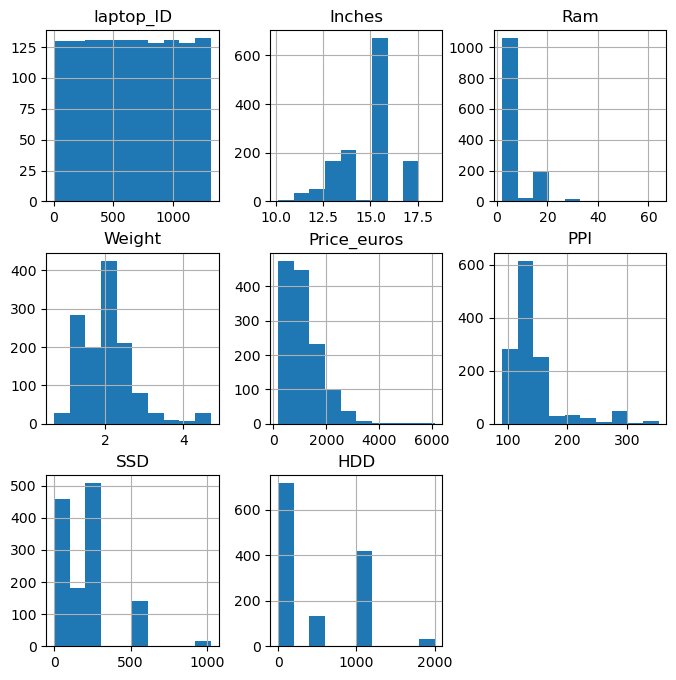

In [23]:
df.hist(figsize=(8,8))
plt.show()

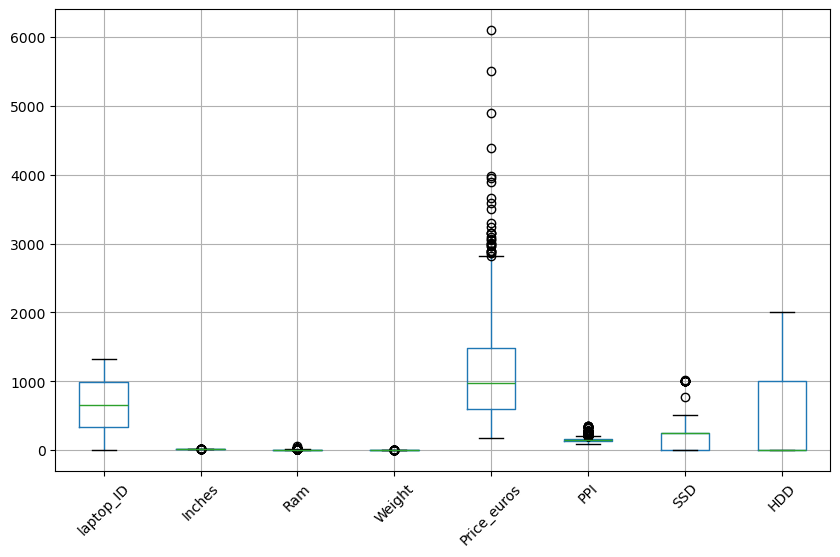

In [24]:
df.boxplot(rot=45, figsize=(10,6))
plt.show()

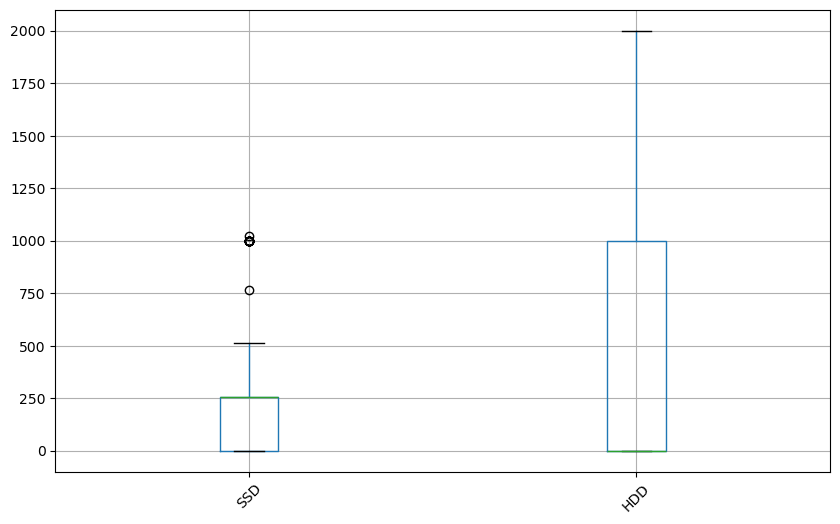

In [25]:
# Select specific columns first
subset = df[[ 'SSD', 'HDD']]
subset.boxplot(rot=45, figsize=(10, 6))
plt.show()

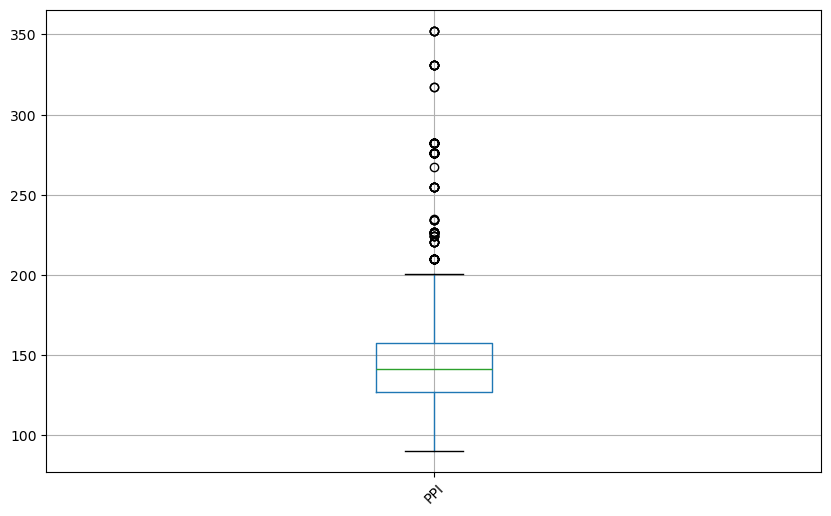

In [26]:
# Select specific columns first
subset = df[['PPI']]
subset.boxplot(rot=45, figsize=(10, 6))
plt.show()


Understanding relationship between variables after cleaning

In [27]:
col_numeric = df.select_dtypes(include=['float', 'int']).columns
df_corr = df[col_numeric].corr()
df_corr

,laptop_ID,Inches,Ram,Weight,Price_euros,PPI,SSD,HDD
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.009092,-0.055860,-0.002163
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,-0.414804,-0.146541,0.539205
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,0.303763,0.600443,0.102948
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,-0.323240,-0.092888,0.530319
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,0.473487,0.671568,-0.094784
PPI,-0.009092,-0.414804,0.303763,-0.323240,0.473487,1.000000,0.525217,-0.298336
SSD,-0.055860,-0.146541,0.600443,-0.092888,0.671568,0.525217,1.000000,-0.433812
HDD,-0.002163,0.539205,0.102948,0.530319,-0.094784,-0.298336,-0.433812,1.000000


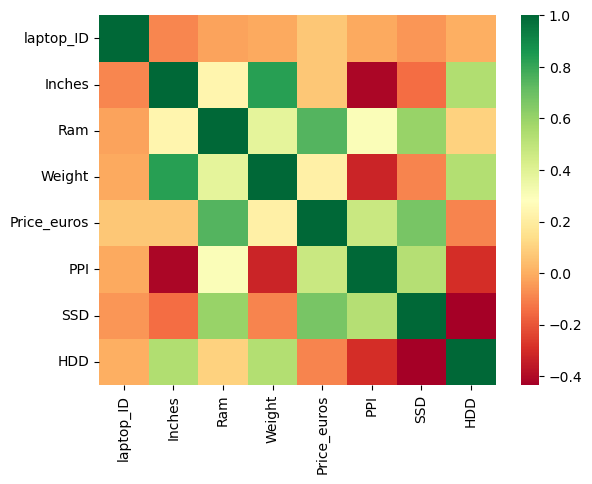

In [28]:
sns.heatmap(df_corr,cmap='RdYlGn')
plt.show()

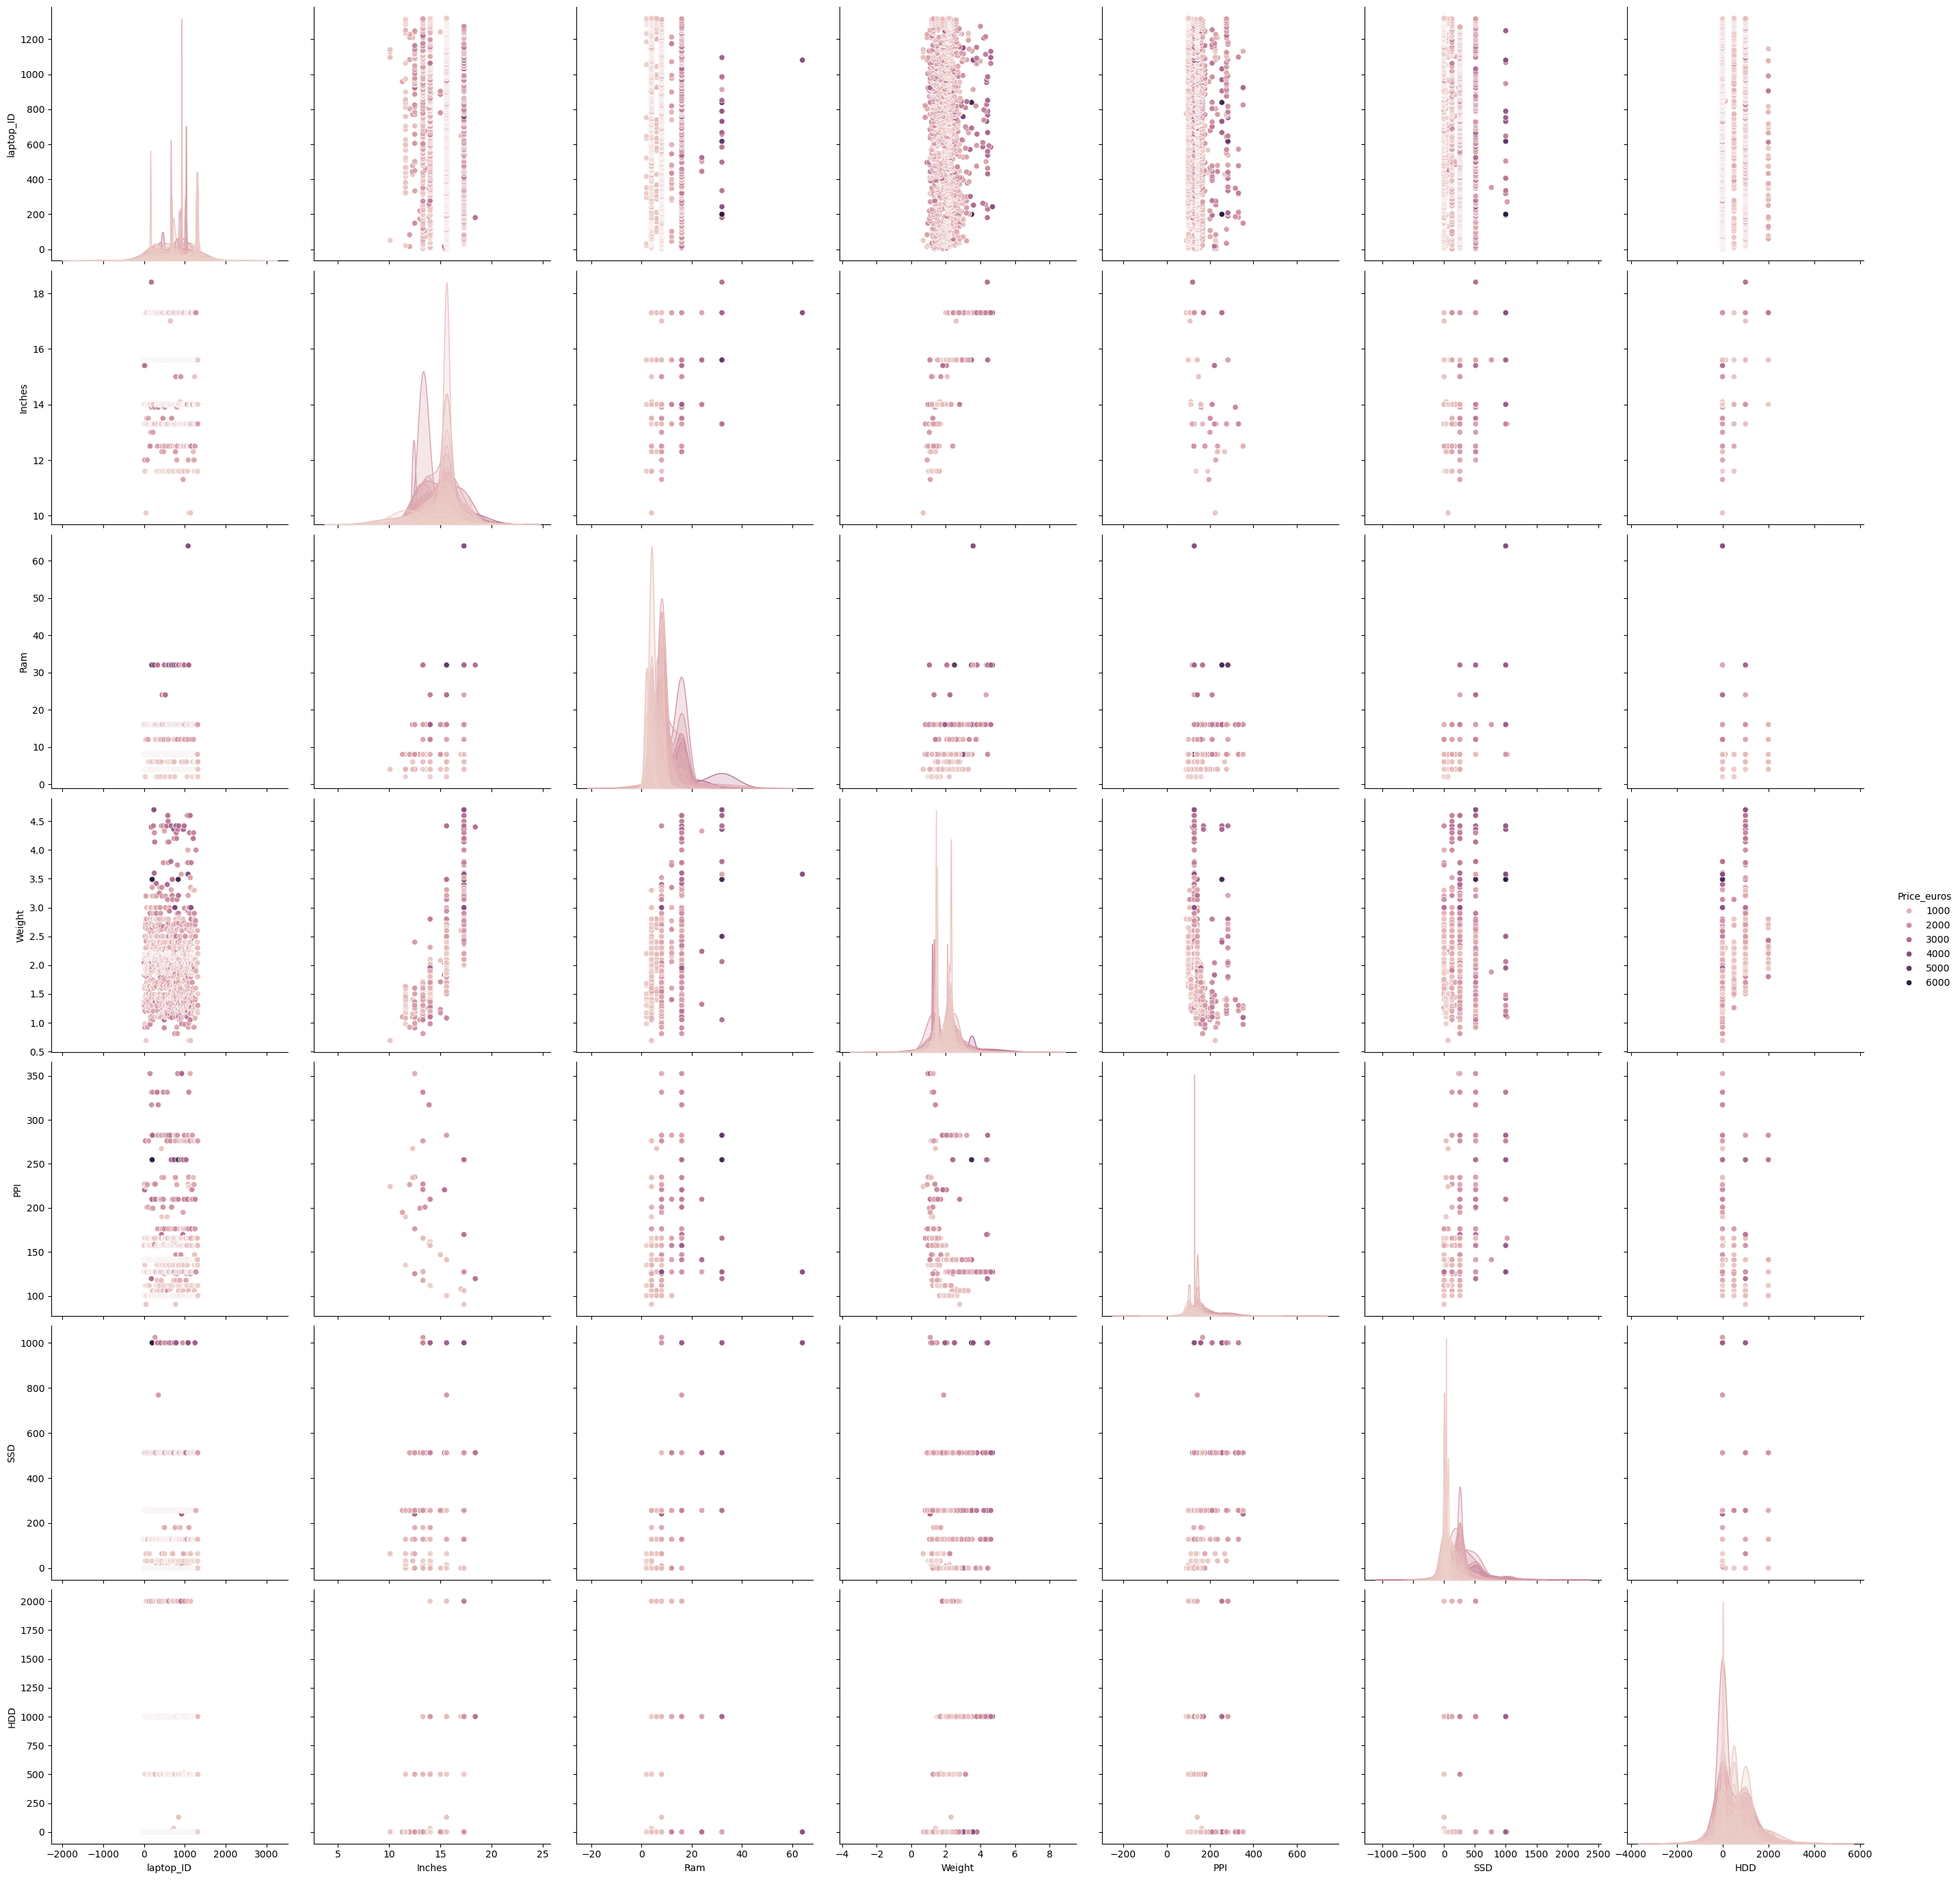

In [29]:
sns.pairplot(df, hue=col_y, height=4, aspect=1)
plt.show()

In [30]:
y = df[col_y]


col_irrelevant = [
    col_y,
    'laptop_ID',
    'Product', 
    'ScreenResolution',
    'Cpu',
    'Cpu_Name',
    'Memory',
    'Gpu'
]

# 3. Create X
x = df.drop(col_irrelevant, axis=1)
x


,Company,TypeName,Inches,Ram,OpSys,Weight,PPI,Cpu_Brand,SSD,HDD,Gpu_Brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,127.677940,Intel Core i5,128,0,Intel
2,HP,Notebook,15.6,8,Others/No OS/Linux,1.86,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,226.983005,Intel Core i5,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,157.350512,Intel Core i7,128,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,276.053530,Intel Core i7,512,0,Intel
1300,Lenovo,Notebook,14.0,2,Windows,1.50,111.935204,Other Intel Processor,64,0,Intel
1301,HP,Notebook,15.6,6,Windows,2.19,100.454670,Intel Core i7,0,1000,AMD


In [31]:
# 4. One-Hot Encoding
x = pd.get_dummies(x, drop_first=True)

print(f"Original Columns: {x.shape[1]}")
print(f"New Columns (after One-Hot): {x.shape[1]}")

x

Original Columns: 39
New Columns (after One-Hot): 39


,Inches,Ram,Weight,PPI,SSD,HDD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,OpSys_Others/No OS/Linux,OpSys_Windows,Cpu_Brand_Intel Core i3,Cpu_Brand_Intel Core i5,Cpu_Brand_Intel Core i7,Cpu_Brand_Other Intel Processor,Cpu_Brand_Other Processor,Gpu_Brand_ARM,Gpu_Brand_Intel,Gpu_Brand_Nvidia
0,13.3,8,1.37,226.983005,128,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,13.3,8,1.34,127.677940,128,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,15.6,8,1.86,141.211998,256,0,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
3,15.4,16,1.83,220.534624,512,0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,13.3,8,1.37,226.983005,256,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,157.350512,128,0,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1299,13.3,16,1.30,276.053530,512,0,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1300,14.0,2,1.50,111.935204,64,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1301,15.6,6,2.19,100.454670,0,1000,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [32]:
display(x.dtypes.to_frame())

,0
Inches,float64
Ram,int64
Weight,float64
PPI,float64
SSD,int64
HDD,int64
Company_Apple,bool
Company_Asus,bool
Company_Chuwi,bool
Company_Dell,bool


## 3.2 Train-Test Split

In [33]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

y_log = np.log1p(y)
test_size = 0.3
random_state = 2026
X_train, X_test, y_train, y_test = train_test_split(
    x, y_log, test_size=test_size, random_state=random_state
)

# 4. Modelling

### 4.2 Train Model

In [34]:
## Initialise and train model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=2026),
    "Random Forest": RandomForestRegressor(random_state=2026),
    "Gradient Boosting": GradientBoostingRegressor(random_state=2026)
}


# 5. Model Evaluation

In [35]:
## Evaluate model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []


for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred_log = model.predict(X_test)
    
    # --- CHANGE START: Convert Log to Actual Price ---
    y_pred = np.expm1(y_pred_log)      # Real Money (e.g., 1500)
    y_test_real = np.expm1(y_test)     # Real Money (e.g., 1450)
    # --- CHANGE END ---
    
    # Calculate Metrics (MUST USE y_test_real HERE)
    # OLD ERROR: mae = mean_absolute_error(y_test, y_pred)
    # NEW CORRECT:
    mae = mean_absolute_error(y_test_real, y_pred)       # <--- Change y_test to y_test_real
    mse = mean_squared_error(y_test_real, y_pred)        # <--- Change y_test to y_test_real
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_real, y_pred)                   # <--- Change y_test to y_test_real
    
    # Store results
    results.append({
        "Model": name,
        "MAE ($)": round(mae, 2),
        "RMSE ($)": round(rmse, 2),
        "R2 Score": round(r2, 3)
    })

# ... (rest of your code)
print(results)
# 6. Show the Comparison Table
results_df = pd.DataFrame(results)
print(results_df)

[{'Model': 'Linear Regression', 'MAE ($)': 275.74, 'RMSE ($)': np.float64(531.81), 'R2 Score': 0.494}, {'Model': 'Decision Tree', 'MAE ($)': 257.46, 'RMSE ($)': np.float64(465.32), 'R2 Score': 0.613}, {'Model': 'Random Forest', 'MAE ($)': 204.38, 'RMSE ($)': np.float64(343.68), 'R2 Score': 0.789}, {'Model': 'Gradient Boosting', 'MAE ($)': 214.59, 'RMSE ($)': np.float64(357.92), 'R2 Score': 0.771}]
               Model  MAE ($)  RMSE ($)  R2 Score
0  Linear Regression   275.74    531.81     0.494
1      Decision Tree   257.46    465.32     0.613
2      Random Forest   204.38    343.68     0.789
3  Gradient Boosting   214.59    357.92     0.771


In [ ]:
## New data

## Predict


## Iterative model development


In [36]:
## Further feature engineering / feature selection
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50,100),      # Number of trees (More = usually better)
    # 'criterion': ['gini', 'entropy'], # Function to measure quality of split
    'criterion': ['friedman_mse', 'squared_error'],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Speed of learning (Lower = more precise)
    'max_depth': randint(3, 10),                 # How deep each tree goes (Deeper = complex)
    'min_samples_split': randint(30, 50),           # Minimum samples to create a split
    # 'max_samples': uniform(0.6, 0.4),            # % of data used to train each tree
    # 'subsample': [0.8, 0.9, 1.0]               # % of data used for each tree
}

# 5. Set up Randomized Search
gb = GradientBoostingRegressor(random_state=2026)

from sklearn.model_selection import RandomizedSearchCV
rs_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=20,         # Try 20 random combinations (Change this to 50 for better results)
    cv=5,              # Cross-validation (Test each combo 3 times to be sure)
    scoring = 'r2',
    n_jobs=-1,          # Use all CPU cores (Faster)
    # verbose=1,         # Show progress bar
    random_state=2026   # Lock the randomness so you get same results as me
)

# 6. Run the Search (This might take a minute)
print("Tuning model... please wait.")
rs_gb.fit(X_train, y_train)

## Obtain best parameters and best estimator
best_rs_params = rs_gb.best_params_
best_rs_gb = rs_gb.best_estimator_
print("Best Parameters: ", best_rs_params)
print("Best Estimator: ", best_rs_gb)

## Evaluate model
y_pred_rs_gb = best_rs_gb.predict(X_test) ## Prediction using model 3
# accuracy_score does not work for regression. Use R2 or MAE/MSE.
print("R2 Score (Accuracy equivalent for regression): ", r2_score(y_test, y_pred_rs_gb))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_rs_gb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred_rs_gb)))
# Save model
import joblib
joblib.dump(best_rs_gb, 'laptop_best_rs_gb_model.pkl') ## Save Gradient Boosting model


Tuning model... please wait.
Best Parameters:  {'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_split': 45, 'n_estimators': 61}
Best Estimator:  GradientBoostingRegressor(max_depth=9, min_samples_split=45, n_estimators=61,
                          random_state=2026)
R2 Score (Accuracy equivalent for regression):  0.877605087021151
Mean Absolute Error:  0.16680812612050747
Root Mean Squared Error:  0.22016693716164432


['laptop_best_rs_gb_model.pkl']